### CSE 5243 - Introduction to Data Mining
## Homework 2: CRISP_DM Steps 4-5
Replace the example information below with your real information:
- Semester: Autumn 2024
- Instructor: Tom Bihari
- Section Tue/Thu 12:45PM
- Student Name: Mary Shas Anak Rowin Umpok
- Student Email: anakrowinumpok.1@osu.edu
- Student ID: 500611954

Based on CRISP-DM Template Version V15.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
- **(I will fill this in for each assignment - Tom Bihari)**
***

### Assignment Overview
In this assignment, you will use a **MODIFIED** copy of the “Bank Marketing” dataset.
- This dataset was pulled from: https://archive.ics.uci.edu/dataset/222/bank+marketing
- Dataset citation: Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.
- Use the **copy of the dataset provided to you** for this assignment.
- The dataset was **modified** to highlight important aspects of data mining (e.g., data cleaning), so **DO NOT publish or otherwise use this dataset for purposes other than this assignment**.

**NOTE: Since you already have pre-processed this dataset in the previous assignment, you may choose to use your "cleaned up" dataset from that assignment, or you may re-doing the work here.**

This assignment covers the **steps 4 and 5 of the six steps** of the **CRISP-DM process model** (Modeling and Evaluation). (See the CRISP-DM materials on CARMEN.)

The **objectives** of this assignment are:
- Solve a business problem by creating, evaluating, and comparing three classification models, and produce the outputs needed to provide business value for your stakeholders.
- Experiment with built-in classification models in **scikit-learn**.

### Problem Statement
Assume that you are the Director of Marketing Analytics for Buckeye Bank Inc (BBI).  BBI wants to improve its market share.
- BBI has obtained data on its existing marketing campaigns.
- In the previous assignment, BBI leadership asked your team to analyze the data, and determine if it is suitable for developing analyses and models that would be effective in improving the marketing campaigns at BBI.
- Based on this analysis, BBI has decided to make improvements to specific aspects of their marketing, with a goal of improving BBI's overall marketing performance.  As a first step, BBI has decided to use data similar to the original dataset to fine tune their marketing efforts to concentrate on prospective customers who are likely to subscribe to their services.

### Supporting Detail (Warning: This is completely unrealistic and oversimplified!)
In a typical year, BBI develops a list of approximately 40000 prospective customers (prospects).  BBI classifies these prospects into two classes.  BBI would like your team to create a prediction model to help guide the sales representatives.
- A predicted **TRUE** prospect (**y** class = "yes") is one they predict will purchase their services. They will be contacted one or more times. For simplicity, assume the total sales cost is fixed at $\$$50, regardless of the actual number of contacts. (This is unrealistic!)
- A predicted **FALSE** prospect (**y** class = "no") is one they predict will NOT purchase their services. They will not be contacted, so the total sales cost is $\$$0.

A successful sale to a prospect benefits BBI $\$$200.

### Things To Do
**In the previous assignment**, you completed the sections for steps 2 and 3 of CRISP-DM.  You **explored** the dataset and **prepared** a clean dataset from it that contains the kind of information you think might be useful.  You now will make use of the dataset.  **NOTE: You may choose to revise your results for steps 2 and 3 from the previous assignment, based on learnings from that asignment.**

You now must **develop** and **evaluate** specific classification models for predicting the **y** "class" variable.  You will try the **off-the-shelf KNN classifier**, and **two other classifiers of your choice**.

Complete **Sections 4 and 5** of CRISP-DM in this notebook (and the **Conclusion**). 

Some intial guidance / sugggestions:

- You must develop a "cost" model from the problem statement above.  Consider creating a table that lists the benefit and cost amounts for a decision on a **single prospect**.  Note that the prospect will be contacted if Predicted is True, and the contacts will result in a successful sale if Actual is True:

| Actual Class | Predicted Class | Sale Benefit | Sale Cost | Net Benefit (Benefit-Cost) |
|---|---|---|---|---|
| FALSE | FALSE | ? | ? | ? |
| FALSE | TRUE  | ? | ? | ? |
| TRUE  | FALSE | ? | ? | ? |
| TRUE  | TRUE  | ? | ? | ? |

- When evaluating your classification models, consider both the benefit or cost "per prospect" and "per year" overall (since the latter is important to the BBI decision-making process).

- Much of the code below may be repetitive.  Consider creating a few reusable functions that can be called for each of the models you build (e.g., evaluation functions).

- **Follow the instructions** in each of the sections below.

It is essential that you **communicate** your goals, thought process, actions, results, and conclusions to the **audience** that will consume this work.  It is **not enough** to show just the code.  It is not appropriate to show long sections of **unexplained printout**, etc.  Be kind to your readers and provide value to them!

**ALWAYS follow this pattern** when doing **each portion** of the work.  This allows us to give feedback and assign scores, and to give partial credit.  Make it easy for the reader to understand your work.
- Say (briefly) **what** you are trying to do, and **why**.
- Do it (code), and comment your code, so others can understand and evaluate it.
- Show or describe the **result** clearly (and briefly as needed), and explain the significant **conclusions or insights** derived from the results. 

**HAVE FUN!**

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns
import sklearn as skl

from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

***
# Section: 1 - Business Understanding - **SKIP THIS!**
- This step is essential (and occasionally ignored…).  It focuses on understanding the business needs and objectives, and defining a data analysis problem that is relevant and useful to the business, so the right solution is built.

- Consider the following questions and discuss the possible answers to them below. (You may simply edit the existing cell and insert your answers.)
  - It is OK to say that you do not know.  How might you get answers to the questions?
  - You may consider some of the questions to be "not applicable".  If so, why?
***

Context
- What is the overview, history, big picture?

Business Objectives
- What is the problem or opportunity to be addressed / solved?
- What is its business value?

Stakeholders
- Who are they?
- What are their needs?

General Goals
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions? What are they?
- Support decisions? What are they?

Scope
- What is the specific scope of the project?
- What, specifically, is NOT in scope? (What are you not doing that someone might think you are doing?)
- Is the scope flexible? In what way?

Deliverables
- Report?
- Reusable code?
- Presentation?

Success Criteria
- What, specifically, must be accomplished for this project to be a success?

Solution Approach
- Is this a “one time” (throw away) solution, or will the solution become part of repeated process that is used and enhanced over time?

Quality
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

Constraints
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

Time / Cost
- What is the deadline or budget?

Dependencies
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

Resources Needed
- Do you potentially need access to specific people, data, etc?

Other Considerations
- What other considerations, not covered above, might be relevant?

***
# Section: 2 - Data Understanding - **SKIP THIS!** (or revise it based on learnings from the previous assignment)
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class attribute (if this is a classification problem).
- This step includes:
  - Understanding what data might be available and relevant.
  - Acquiring the data.
  - Understanding the characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Understanding how other datasets might enhance or supplement the data (and acquiring that data as well).
  - Possibly performing some initial analysis to build confidence that the overall direction is likely to be helpful to the business problem to be solved.

**NOTE:** Frequently, a first pass is made through the data to fix or remove "obvious" data quality issues (missing values, duplicate records, outliers (some), etc.).  The deeper Data Understanding analysis then is done on the "cleaned" data.  This mitigates the issue of bad data skewing the data analysis results.  **You may choose to do this separate first pass. If you do so, clearly document your approach.**
***

***
## Section: 2.1 - Describe the meaning and type of data for each attribute.

Identify the type of data for each attribute.
  - Categorical: Nominal, Ordinal
  - Numerical: Interval, Ratio
  - Other: Complex or unstructured data (e.g., text strings, images,...)
  
NOTES:
  - This determines what operations are "meaningful" for each attribute.  For example, you can't add two Ordinal attributes.
  - You can't always tell the attribute types from the data itself.  For example, an Integer attribute could be Ordinal or Interval.

Identify interesting characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Is this dataset relevant and appropriate for the goals of this project?
    - If not, what could you do? (find other data to replace or supplement this dataset, etc.)
***

### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**
- Hint: Look at the information on the source website.  Be careful!  Hand-written metadata is frequently out of date or incorrect.

**Discussion:**
| Attr | Data Type | Meaning |
|------|-----------|---------|
| age | numerical | age |
| job | categorical (nominal) | type of job (admin, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician, services)|
| marital | categorical (nominal) | marital status (married, divorced, single) |
| education | categorical (ordinal) | level of education (unknown, secondary, primary, tertiary) |
| default | binary | has credit in default? |
| housing | binary | has housing loan? |
| loan | binary | has personal loan? |
| contact | categorical (nominal) | contact communication type (unknown, telephone, cellular) |
| day_of_week| categorical (string) | day of the week (monday, tuesday, wednesday, thursday, friday, saturday, sunday) |
| month | categorical (string) | month (january, february, march, etc) |
| duration | numerical | last contact duration in seconds |
| campaign | numerical  | number of contacts performed during this campaign and for this client including last contact |
| pdays | numerical  | number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous | numerical  | number of contacts performed before this campaign and for this client |
| poutcome | categorical (nominal) | outcome of the previous marketing campaign (nonexistent, failure, success) |
| emp.var.rate | numerical | employment variation rate (quarterly indicator) |
| cons.price.idx | numerical | consumer price index (monthly indicator) |
| cons.conv.idx | numerical | consumer confidence index (monthly indicator) |
| euribor3m | numerical | the rate of deposits in Euros for a period of 3 months |
| nr.employed | numerical | number of employees (quarterly indicator) |
| y | binary | has the client subscribed a term deposit? |

**Observations:**
- most of our attributes inherit categorical data type
- the attributes can be divided into 4 types:
    - age, job, marital education, default, housing, and loan attributes are personal information of our clients
    - contact, month, duration, campaign, pdays, previous, and poutcome are attributes related to the campaign
    - emp.var.rate, cons.price.idx, cons.conv.idx, euribor3m, nr.employed attributes can be put under "other" type
    - y attribute are the output variable


### **Load the Dataset.**

In [2]:
# Note: Edit the path here to match your setup.
# If you are using your dataset from the previous assignment, you may load it here.
data_df = pd.read_excel('bank-additional-full-TEB1.xlsx', sheet_name='ModifiedData')

In [3]:
data_df.head().T

,0,1,2,3,4
IDX,1,2,3,4,5
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may


**Observation:**
- the first 5 rows shows that all 5 clients have similar value for marital status, contact, month, day_of_week, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, and y attributes
- 3 of the clients are working in the services industry
- all clients are middle-aged

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDX             41188 non-null  int64  
 1   age             41188 non-null  int64  
 2   job             41188 non-null  object 
 3   marital         41187 non-null  object 
 4   education       41188 non-null  object 
 5   default         41187 non-null  object 
 6   housing         41188 non-null  object 
 7   loan            41188 non-null  object 
 8   contact         41188 non-null  object 
 9   month           41187 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  duration        41188 non-null  int64  
 12  campaign        41188 non-null  int64  
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  int64  
 15  poutcome        41187 non-null  object 
 16  emp.var.rate    41188 non-null  float64
 17  cons.price.idx  41188 non-null 

**Observation:**
- total counts for marital, default, month, poutcome, and y attributes are less than the others
- all attributes are non-null

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [5]:
data_df.describe()

,IDX,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20594.50000,40.030761,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,11890.09578,10.512520,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,1.00000,5.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10297.75000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20594.50000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30891.25000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41188.00000,311.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Discussion:**

To get the basic statistics for the attributes, I used the describe method. The output only contains attributes with numerical data type.
From the basic statistics table above, there are a few things that is worth to note.
1. In age attribute, the max value of 311 is too large. That is a clear error because no one could possibly be at the age of 311. The min value of 5 is also too small.
2. In previous attribute, the value for 25th, 50th and 75th percentile are 0. This shows that majority of the data for previous are 0 or value close to 0.
3. The value 999 in pdays might be an error or it could possibly represent that the client was not previously contacted. In the UCI dataset, it mentioned that the value -1 represent that the client was not previously contacted, however there isn't any -1 value found in previous data and the value 999 is oddly large.


***
## Section: 2.3 - Visualize / analyze the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

In [6]:
categorical_attribute_names = ['age', 'job', 'default', 'housing', 'loan']
print("Total records:", data_df.shape[0], "- Value count per age attribute:\n")
for att in categorical_attribute_names:
    print(data_df[att].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=False))
    print("\n")

Total records: 41188 - Value count per age attribute:

age
31     1946
32     1846
33     1833
36     1780
35     1759
       ... 
311       1
94        1
112       1
95        1
5         1
Name: count, Length: 81, dtype: int64


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


default
no         32587
unknown     8597
yes            3
NaN            1
Name: count, dtype: int64


housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64




**Discussion:**

1. For the age attribute, the value 5 and 311 might be a typo because nobody lives till 311 and a 5 years old shouldn't be in the list because they are still too young to participate. 
2. For the job attribute, the data shows nothing out of the ordinary but it tells us that people working corporate or full time jobs have higher frequency.
3. The NaN values in default attribute will be discussed in the next section.
4. For housing attribute, the data frequency shows that the number of people who has housing loans are almost similar to those who doesn't.
5. For loan attribute, the data frequency shows that the number of people who doesn't have personal loan are significantly higher compare to those that does have personal loan. 
6. In job, default, housing, and loan attribute, it it is worth to note that there a lot of unknown data and having lots of unknowns affect the quality of the data in terms of completenes.

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

### MISSING VALUES

In [7]:
na_df = data_df[data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()
selected_attribute_names = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

print("Total records:", data_df.shape[0], "- Number of Records with NA", num_records_with_na, "- Number of NA values:", num_na_values)

na_df.head(10);

print("NA Values per Attribute:")
for att in selected_attribute_names:
    num_na = na_df[att].isna().sum()
    if num_na > 0:
        print(att, na_df[att].isna().sum())

Total records: 41188 - Number of Records with NA 5 - Number of NA values: 5
NA Values per Attribute:
marital 1
default 1
month 1
poutcome 1
y 1


**Discussion:**

In order to find the missing data, I scan through all the selected attributes and check if there are any empty cell. The results shown above shows that we have 5 attributes that are missing 1 value respectively. The attributes are marital, default, month, poutcome, and y. Since these are categorical and binary attributes, we can't simply fill in the missing data unlike numerical attributes where we are able to derived the data from calculation for some cases.

### DUPLICATES

In [8]:
dup_df = data_df[data_df.duplicated()]
num_dup_records = dup_df.shape[0]

print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(10)

Number of duplicate records across all attributes: 0


,IDX,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


**Discussion**

The result shows that there aren't any duplicate data in our dataset.

### OUTLIERS

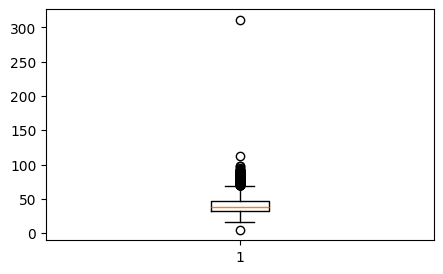

In [9]:
fig = plt.figure(figsize=(5,3))
plt.boxplot(data_df.age)
plt.show()

**AGE**  
Age attribute has a lot of outliers too but most of them are not too far away from the normal range. Age 311 and 5 are not possible and clearly an outlier. However, the outlier with values above 100 is questionable to me but it is still possible for us to consider because there are people who lives beyong the age 100.

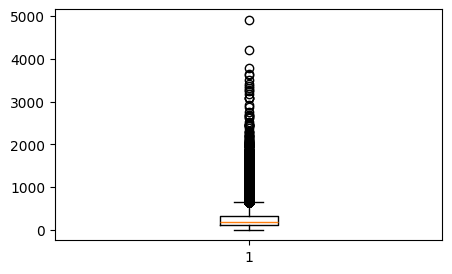

In [10]:
fig = plt.figure(figsize=(5,3))
plt.boxplot(data_df.duration)
plt.show()

**DURATION**  
Duration attribute has a lot of outliers that is out of the normal range. The most obvious outliers are values above 4000.

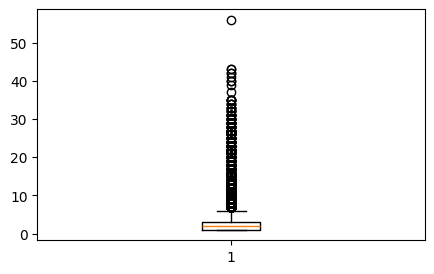

In [11]:
fig = plt.figure(figsize=(5,3))
plt.boxplot(data_df.campaign)
plt.show()

**CAMPAIGN**  
Campaign attribute also has many outliers. Since campaign attributes means the number of contacts performed during the campaign, the outliers might show that these clients have shown more interest, hence more number of contacts. I would assume the one outlier above 50 is a typo, but since it is not too much far away from the other outliers, I would not remove it.

***
## Section: 2.5 - Explore the relationships among the attributes.
- You may include or exclude the class attribute as appropriate.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
- There are three general cases for 2-attribute relationships:
  - Categorical vs Categorical
  - Categorical vs Numerical
  - Numerical vs Numerical
- See these references for additional guidance:
  - https://www.scribbr.com/statistics/statistical-tests/
  - https://researcher.life/blog/article/independent-vs-dependent-variables-definition-examples/
  - https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
***

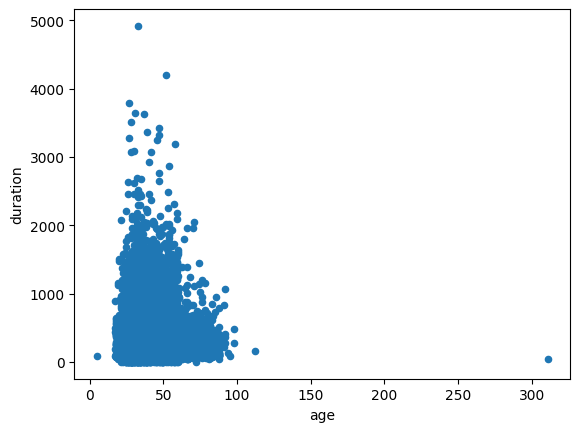

In [12]:
plot = data_df.plot.scatter(x="age",y="duration")

**Observation:**  
Firstly, we can clearly observed that as age increases, the number of duration in seconds decreases. It is also mostly concentrated within the range of 0-2000 for duration and within the range of 20-80 (rough estimation) for age. What I can deduce from this information is that a call generally would last at most 2000 seconds if you're are within the age of 20-60, and at most 1000 seconds if you're are 60 years old and above. Other than that, looking at the less concentrated area, which is when the duration would go on after 2000 seconds, it lies within the age range of 25-55. So, I would assume that clients within the age of 25-55 are mostly interested and are engaging during the call.

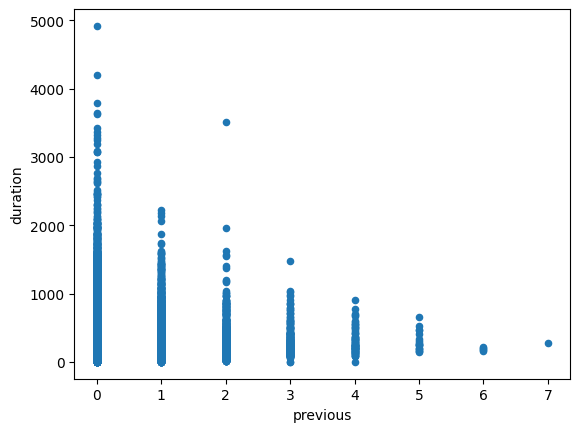

In [13]:
plot = data_df.plot.scatter(x="previous",y="duration")

**Observation**  
The reason why I chose to look at the relationship between previous and duration is because I want to check if the number of times the client was contacted before the campaign affects the duration of the last contact during the campaign. The scatter plot is showing me that previous contacts do affect the last contact duration. As we can clearly see, as the number of previous contact increases, the number of duration decreases. What I can deduce from this information is client that have never been contacted before the campaign, are more interested in the call because they are curious what the campaign is about. Meanwhile, client that have been contacted several times before the campaign, are less interested because they already know about the campaign.

***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.
***

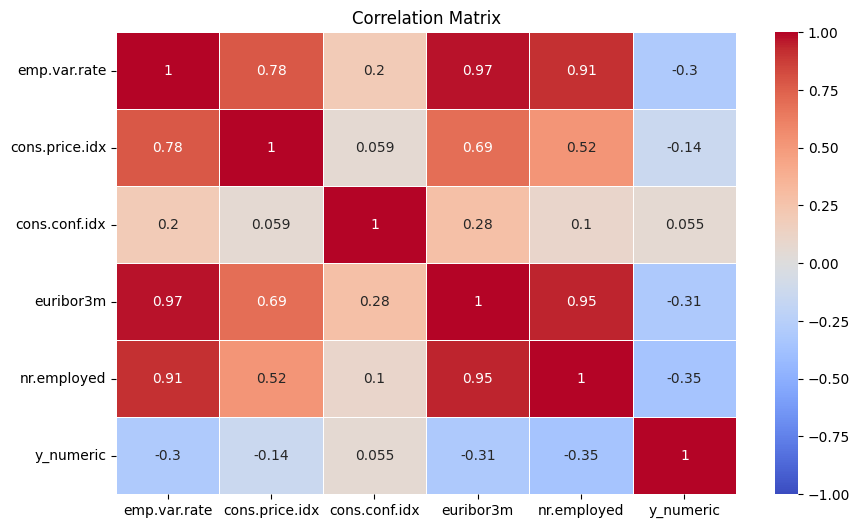

In [14]:
data_df['y_numeric'] = data_df['y'].map({'yes': 1, 'no': 0})

corr_matrix = data_df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_numeric']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

I chose to analyse the relationship between 'y' and the attributes that I categorized under 'Other' in Section 2.1 because I'm curious to see if there is any correlation between y and these attributes. This would help me understand if any of these 'Other' attributes would affect the result of 'y'.  
Before creating the correlation matrix, I convert 'y' variable to numeric by representing yes with value 1, and no with value 0. Then, I grouped the attributes that I want to include to create the correlation matrix. I used heatmap to better visualize the correlation.  
Based on the correlation matrix heatmap, emp.var.rate, cons.price.idx, euribor3m, and nr.employed have negative correlation with the class attribute 'y'. Based on my understanding on correlation matrix, negative correlation imply an inverse relationship. So when 'y' increase, the other variable decrease. Other than that, correlation matrix between cons.conf.idx and y is 0.055, which is close to 0. So, I will assume that cons.conf.idx has no correlation to y at all.

***
# Section: 3 - Data Preparation - **SKIP THIS!** (or revise it based on learnings from the previous assignment)
In this step, the “final” target dataset is constructed (although nothing is ever final…), based on the insights gleaned in the Data Understanding step.
This may include:
- Normalizing / standardizing the data.
- Handling missing and erroneous data.
- Transforming or eliminating attributes.
- “Blending” data from multiple sources (with attention to consistency of the various sources).
- Deploying the data to storage in suitable formats, data models / structures.

**NOTE:** In each of these sections, it is OK to decide to **not** make changes to the dataset, but you **must** explain **why** you made the choice.  Recall that the purpose of this step is to produce a clean dataset that is suitable for the intended purposes.  So, for example, you might choose to not remove any attributes, but if you have 100 apparently irrelevant attributes, explain why are you keeping them - there may be a good reason.
***

***
## Section: 3.1 - Clean the Data
- Implement any data cleaning steps previously identified.  Please justify.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

In [15]:
clean_data_df = data_df.copy()

**REMOVING OUTLIERS FROM AGE**  
- The value 311 is clearly an invalid value. Most likely, this is a typo and it should be 31.
- The value 5 is might also be an invalid value. But since that individual's marital status is married, they are likely to be in their 50s. However, in this case, I will remove it because it it harder to assume the specific age it should be.

In [16]:
#replace the invalid value
clean_data_df['age'] = clean_data_df['age'].replace(to_replace=311, value=31)
#remove the row where age == 5
indexAge = clean_data_df[(clean_data_df['age'] == 5)].index
clean_data_df.drop(indexAge, inplace=True)

**REMOVING ROWS WITH MISSING VALUES**  
- In Section 2.4, the result shows that marital, default, month, poutcome, and y attributes have 1 missing values respectively. So, I will remove the respective row because I can't fill in the missing values since it is categorical data type.

In [17]:
clean_data_df.dropna(axis=0, how='any', inplace=True, subset=['marital', 'default', 'month', 'poutcome', 'y'])

**CHECKING FOR MISSING VALUE**  
- The result below shows that cleaning the data, we no longer have any missing values in our dataset.

In [18]:
clean_na_df = clean_data_df[clean_data_df.isna().any(axis=1)]
num_records_with_na = clean_na_df.shape[0]
num_na_values = clean_na_df.isna().sum().sum()
selected_attribute_names = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

print("Total records:", clean_data_df.shape[0], "- Number of Records with NA", num_records_with_na, "- Number of NA values:", num_na_values)

clean_na_df.head(10);

for att in selected_attribute_names:
    num_na = clean_na_df[att].isna().sum()
    if num_na > 0:
        print(att, clean_na_df[att].isna().sum())

Total records: 41182 - Number of Records with NA 0 - Number of NA values: 0


**CHECKING FOR OUTLIERS IN AGE**  
- The result shows that the chosen outliers which are 311 and 5, have been removed.

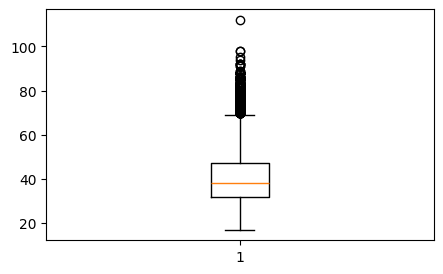

In [19]:
fig = plt.figure(figsize=(5,3))
plt.boxplot(clean_data_df.age)
plt.show()

In [20]:
clean_data_df.describe()

,IDX,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_numeric
count,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000
mean,20595.408747,40.024477,258.300471,2.567457,962.470133,0.172964,0.081778,93.575609,-40.502574,3.621187,5167.031048,0.112671
std,11889.972793,10.426296,259.293155,2.769940,186.924003,0.494917,1.570985,0.578819,4.628342,1.734474,72.253412,0.316194
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,10300.250000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,20595.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,30891.750000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,41188.000000,112.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


**REMOVE UNKNOWN FROM MARITAL**
- This is done for modeling purposes in Section 4.

In [21]:
clean_data_df = clean_data_df[clean_data_df['marital'] != 'unknown']

***
## Section: 3.2 - Select Attributes
- Optionally, remove attributes that are unneeded, redundant, etc., for the expected uses.
- Which attributes did you decide to remove, if any? Please justify.
***

Based on Section 2.6, I concluded that cons.conf.idx has no correlation to y variable. **Therefore, I will remove cons.conf.idx.**

In [22]:
clean_data_df.drop('cons.conf.idx', axis=1, inplace=True)

In [23]:
clean_data_df.describe()

,IDX,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_numeric
count,41102.000000,41102.000000,41102.000000,41102.000000,41102.000000,41102.000000,41102.000000,41102.000000,41102.000000,41102.000000,41102.000000
mean,20592.741059,40.023989,258.194540,2.566250,962.519512,0.172765,0.082368,93.575812,3.621787,5167.049805,0.112598
std,11889.478113,10.425716,259.233116,2.767527,186.803280,0.494789,1.570785,0.578706,1.734303,72.257237,0.316105
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,0.634000,4963.600000,0.000000
25%,10297.250000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,1.344000,5099.100000,0.000000
50%,20588.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,4.857000,5191.000000,0.000000
75%,30885.750000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,4.961000,5228.100000,0.000000
max,41188.000000,112.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,5.045000,5228.100000,1.000000


***
## Section: 3.3 - Create Attributes
- Optionally, create new attributes based on the values of other attibutes.
- Which new attributes did you decide to create, if any? Please justify.
***

**Discussion:**

I choose to not create any new attributes because first, most of our attributes inherit categorical data type, so I can't combine any 2 attributes to create a new attribute. Most importantly, I don't see a need to add a new attribute.

***
## Section: 3.4 - Transform Attributes
- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.
***

**Discussion:**

I don't see a need to transform any attributes. However, I want do it for practice.  
I choose to change the unit of duration from seconds to minutes. After converting it to minutes, I think it is actually more helpful to have duration in minutes because it was hard to know how long 2000 seconds are compare to knowing how long 2 minutes are.

In [24]:
clean_data_df['duration'] = clean_data_df['duration'] / 60

In [25]:
clean_data_df.head()

,IDX,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y,y_numeric
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,4.350000,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no,0.0
1,2,57,services,married,high.school,unknown,no,no,telephone,may,mon,2.483333,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no,0.0
2,3,37,services,married,high.school,no,yes,no,telephone,may,mon,3.766667,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no,0.0
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,2.516667,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no,0.0
4,5,56,services,married,high.school,no,no,yes,telephone,may,mon,5.116667,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no,0.0


***
## Section: 3.5 - Select Records
- Optionally, select a subset of the records, via sampling, etc., to decrease the size of the dataset. Please justify.
***

**Discussion:**

I don't see the need to trim the records too. However, I want to do it for practice. As we can see, after trimming the records, the statistics for the attributes changed accordingly.

In [26]:
clean_data_sample_df = clean_data_df.sample(n=30, replace=True, random_state=45)
clean_data_sample_df.describe()

,IDX,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_numeric
count,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,20134.466667,40.266667,2.963333,2.200000,999.0,0.033333,0.246667,93.534633,3.909700,5182.120000,0.066667
std,10921.552753,8.432013,2.780448,1.900998,0.0,0.182574,1.366529,0.494710,1.503394,50.986614,0.253708
min,1181.000000,24.000000,0.250000,1.000000,999.0,0.000000,-2.900000,92.893000,1.250000,5076.200000,0.000000
25%,9082.500000,34.250000,1.141667,1.000000,999.0,0.000000,-0.100000,93.200000,4.076000,5191.000000,0.000000
50%,21809.000000,39.000000,2.341667,1.000000,999.0,0.000000,1.100000,93.444000,4.857000,5195.800000,0.000000
75%,26826.000000,45.000000,3.825000,3.000000,999.0,0.000000,1.400000,93.994000,4.954500,5228.100000,0.000000
max,36551.000000,58.000000,14.800000,9.000000,999.0,1.000000,1.400000,94.465000,4.968000,5228.100000,1.000000


***
## Section: 3.6 - Other Data Preparation
- Optionally, perform other preparation steps (e.g., to optimize storage, retrieval, etc.). Please justify.
***

**Discussion:**
I don't see any need to do any other data preparation.

***
# Section: 4 - Modeling - **DO THIS!**
In this step, the dataset is analyzed and used to create models and/or answer questions relevant to the business. This may include:
- Developing statistical models for describing or predicting business situations.
- Training data mining (e.g., machine learning) algorithms for classification, clustering, association analysis, outlier detection, and other uses.

NOTE: This step is tightly coupled and iterative with the Data Preparation and Evaluation steps.
***

### MODELING

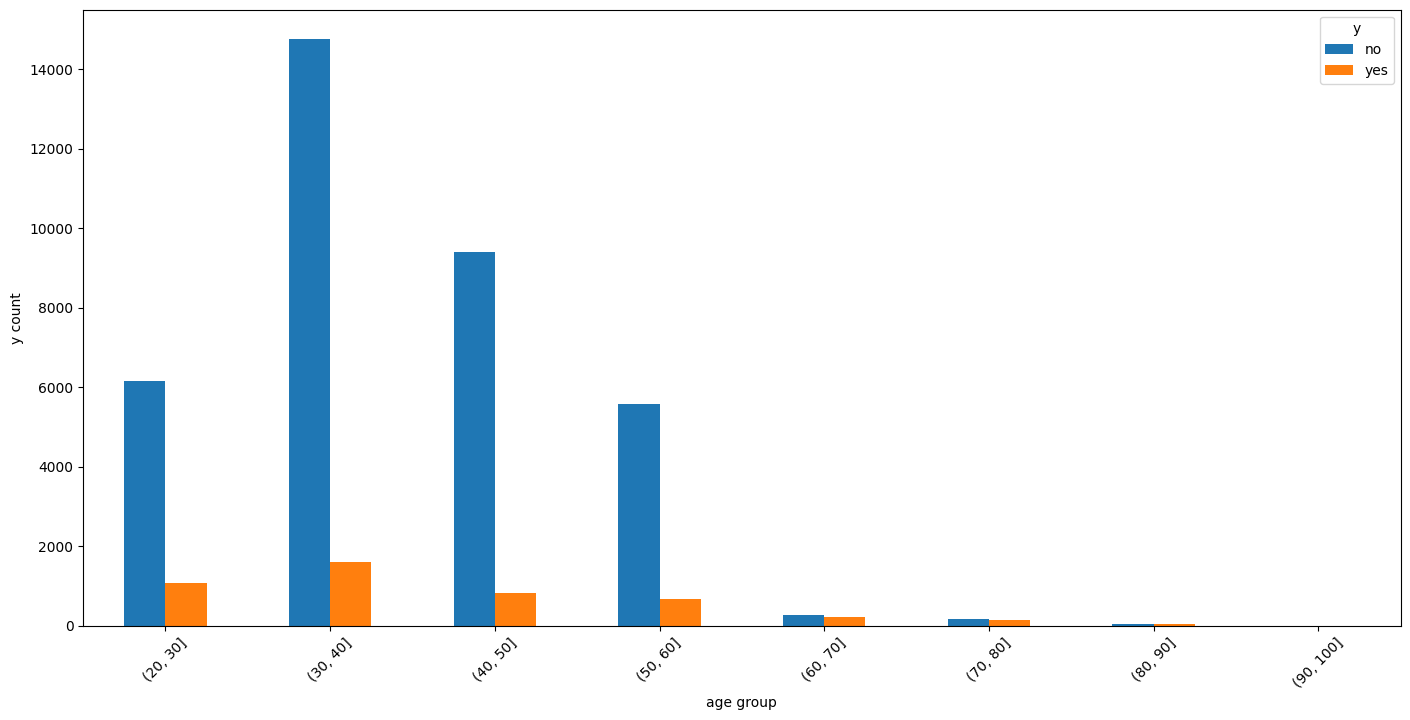

In [27]:
clean_data_df['age_group'] = pd.cut(clean_data_df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100])
crosstab_data_grouped = pd.crosstab(clean_data_df['age_group'], clean_data_df['y'])

# Plot again with fewer age categories
crosstab_data_grouped.plot(kind='bar', stacked=False, figsize=(17, 8))
plt.ylabel('y count')
plt.xlabel('age group')
plt.xticks(rotation=45)
plt.show()


**Discussion:**

The figure above shows that people within the age 20-60 has the highest yes count. The number of yes count decrease as age increase, and it only increase when age is within the range 30-40, then it drop back down. This indicates that age is a good predictor of y value.

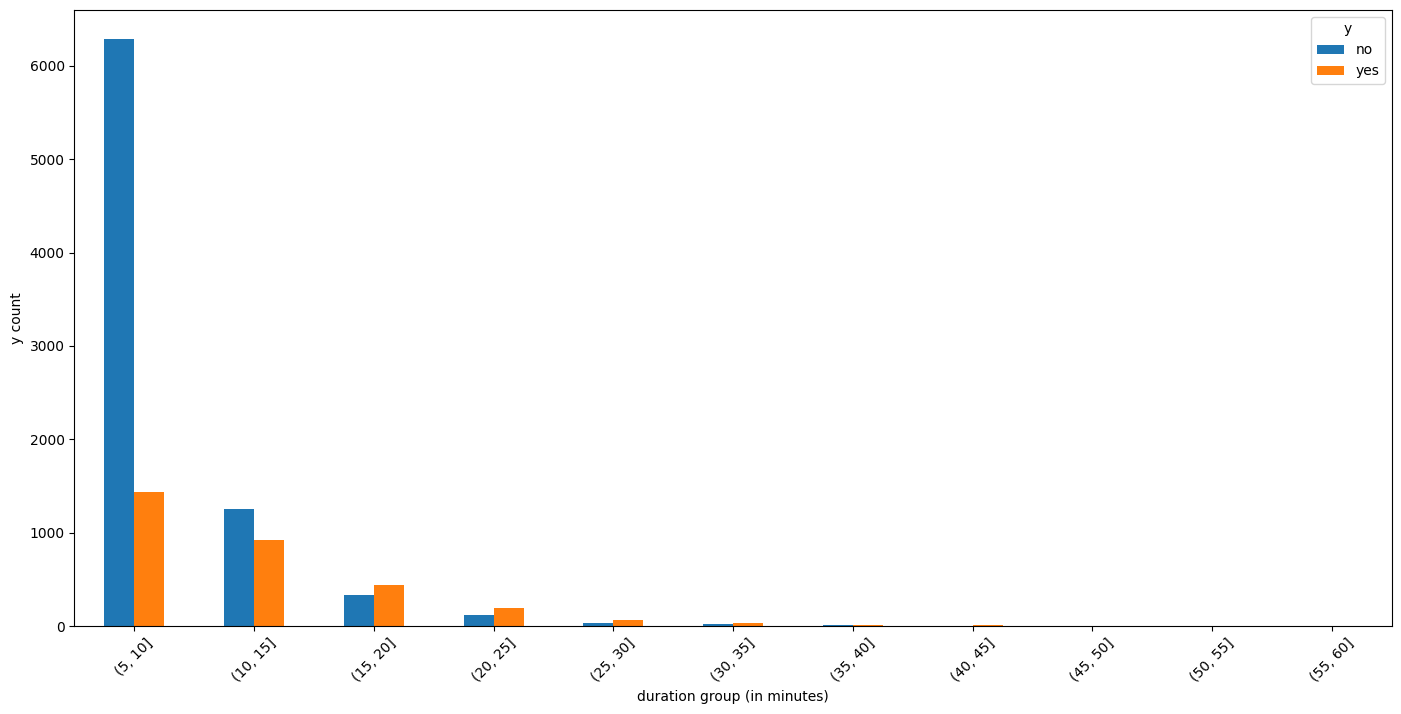

In [28]:
clean_data_df['duration_group'] = pd.cut(clean_data_df['duration'], bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
crosstab_data_grouped = pd.crosstab(clean_data_df['duration_group'], clean_data_df['y'])

# Plot again with fewer age categories
crosstab_data_grouped.plot(kind='bar', stacked=False, figsize=(17, 8))
plt.ylabel('y count')
plt.xlabel('duration group (in minutes)')
plt.xticks(rotation=45)
plt.show()

**Discussion**

The figure above shows that there is a relationship between y and duration, where when duration increases, y decreases. Therefore, duration could be a good predictor of y value.

In [29]:
table = pd.pivot_table(clean_data_df, values='y', index=['marital'], \
                       columns=['y_numeric'], aggfunc=lambda x: len(x), fill_value=0, margins=True)

table

y_numeric,0.0,1.0,All
marital,,,
divorced,4135,476,4611
married,22393,2532,24925
single,9946,1620,11566
All,36474,4628,41102


**Discussion**

According to the pivot table above, only looking at the column 1.0 which maps to 'yes' for y value, married and single people are highly likely to say yes compared to divorced people. Therefore, marital status could be a good indicator of y value.

Note: In section 3.1, I clean the data where I removed the unknown from marital.

In [30]:
table = pd.pivot_table(clean_data_df, values='y', index=['job'], \
                       columns=['y_numeric'], aggfunc=lambda x: len(x), fill_value=0, margins=True)

table

y_numeric,0.0,1.0,All
job,,,
admin.,9057,1350,10407
blue-collar,8602,635,9237
entrepreneur,1330,123,1453
housemaid,951,106,1057
management,2593,328,2921
retired,1282,433,1715
self-employed,1267,149,1416
services,3639,323,3962
student,599,275,874


**Discussion**

The pivot table above shows that people with administrative job accounts for the highest number of yes for y value. The next 2 highest number of yes belongs to people with technician and blue-collar job. These 3 numbers are significantly higher compared to the other jobs. So, I would say that job could be a good indicator of y value.

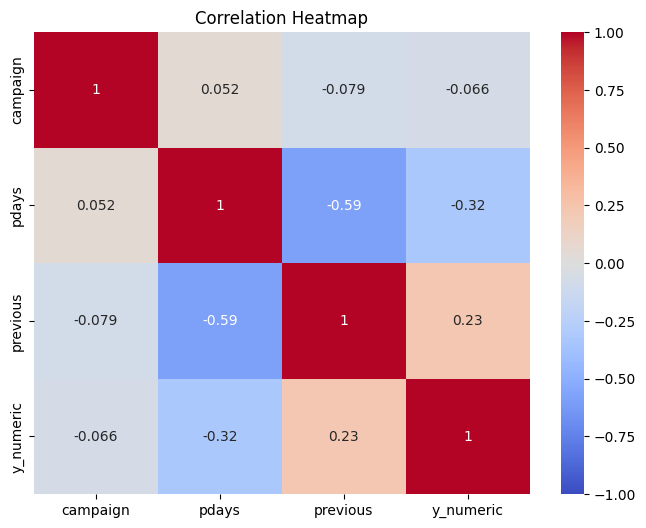

In [31]:
corr_matrix = clean_data_df[['campaign', 'pdays', 'previous', 'y_numeric']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Discussion**

Based on the correlation heatmap above, the attribute 'previous' has the highest positive correlation with y value. However, the value 0.23 is close enough to 0 that it is easier to assume that previous has no correlation with y value. Hence it is not a good identifier of y value.

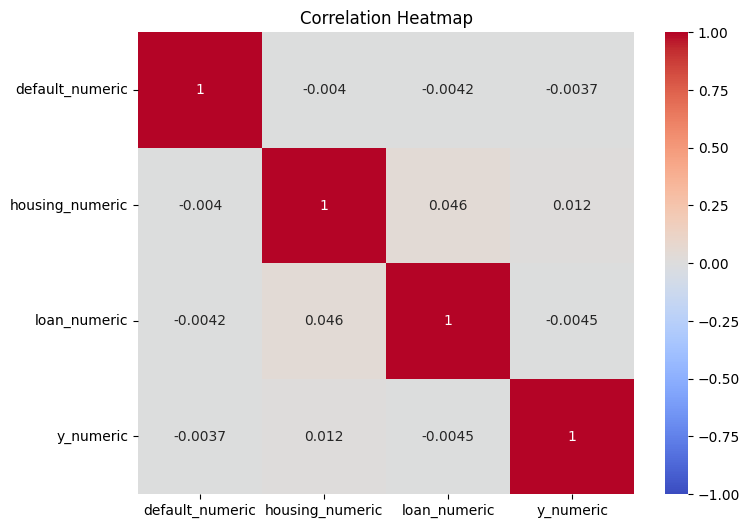

In [32]:
clean_data_df['default_numeric'] = clean_data_df['default'].map({'yes': 1, 'no': 0})
clean_data_df['housing_numeric'] = clean_data_df['housing'].map({'yes': 1, 'no': 0})
clean_data_df['loan_numeric'] = clean_data_df['loan'].map({'yes': 1, 'no': 0})

corr_matrix = clean_data_df[['default_numeric', 'housing_numeric', 'loan_numeric', 'y_numeric']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Discussion**

The correlation heatmap above clearly shows that there aren't any correlation between housing loan, credit default, personal loan and y value respectively because the numbers are close to 0. So, default, housing and loan are not good indicator of y value.

***
## Section: 4.1 - Evaluation of the Off-The-Shelf KNN Classifier
- Select the KNN classifier from the SciKit Learn library and run it on the dataset.
***

***
### Section: 4.1.1 - Configure the off-the-shelf KNN classifier
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from pandas import get_dummies

**BENEFIT-COST MODEL**
- After doing the calculation, the table below shows that BBI will lose $50 if the model predicted yes but the actual class is no. BBI will gain $150 if the model predicted yes and the actual class is yes too. BBI will gain $200 if the model predicted no but the actual class is yes because there is no cost.

| Actual Class | Predicted Class | Sale Benefit | Sale Cost | Net Benefit (Benefit-Cost) |
|---|---|---|---|---|
| NO | NO | 0 | 0 | 0 |
| NO | YES  | 0 | -50 | -50 |
| YES  | NO | 200 | 0 | 200 |
| YES  | YES  | 200 | 50 | 150 |

**HELPER FUNCTIONS**

- I used the helper functions from the Graduate Student Final Project Example.
- The value for nb_matrix is taken from the benefit-cost model table above.

In [34]:
def calculate_net_benefit_per_record(confusion_matrix):
#               PREDICTED VALUES
#                  0   1 
    nb_matrix = [[ 0, -50],   # 0 (term deposit = no) TRUE VALUES
                 [ 0, 150]]   # 1 (term deposit = yes)

    total = 0
    for r in range(0, 2):
        for c in range(0, 2):
            #print(nb_matrix[r][c], confusion_matrix[r][c])
            total = total + nb_matrix[r][c] * confusion_matrix[r][c]

    return total / np.sum(confusion_matrix)

In [35]:
number_of_prospect = 40000
def evaluate_classifier_results(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(pd.DataFrame(conf_matrix),"\n")  # true values in rows, predicted in columns
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    net_benefit = calculate_net_benefit_per_record(conf_matrix)
    print("Net Benefit per Record: $ %10.2f" % (net_benefit))
    print("Net Benefit per Year:   $ %10.2f" % (net_benefit * number_of_prospect))

**Explanation:**

Based on the modeling that I've done above, I decided to choose age, job, marital, and duration for my X dataset and my y dataset will be the y_numeric attributes. Before I compute my KNN classifier, I convert the marital status from string to float, and I used OneHotEncoding, shown in the Preprocessing example file provided, to convert job string type to float. I did this because KNN classifier only accepts float notation.

In [36]:
clean_data_df['marital_numeric'] = clean_data_df['marital'].map({'married': 1, 'single': 0, 'divorced': -1})

#NominalEncoding - OneHotEncoding
clean_data_df = get_dummies(clean_data_df, columns=['job'], dtype=float, drop_first=False, dummy_na=True)


In [37]:
print(clean_data_df.columns)

Index(['IDX', 'age', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'euribor3m',
       'nr.employed', 'y', 'y_numeric', 'age_group', 'duration_group',
       'default_numeric', 'housing_numeric', 'loan_numeric', 'marital_numeric',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'job_nan'],
      dtype='object')


***
### Section: 4.1.2 - Run and evaluate the classifier
- Try several values of the K parameter and compare the results.
- Evaluate the performance of the classifier, using the evaluation methods you defined above.
***

**Explanation:**

Once I did all the necessary conversion, I split both X and y dataset into train and test datasets. I used KNeighborsClassifier function to build the classification model. Then, I train and test the model using the train and test datasets. I chose the value 5 for n_neighbors because its a default value, so I think its a good starting point since it is difficult to decide what is the perfect n_neighbors value.

In [38]:
X = clean_data_df[['age', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_numeric', 'duration']]
y = clean_data_df['y_numeric'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

evaluate_classifier_results(y_test, knn_y_pred)

Confusion Matrix:
       0    1
0  10483  459
1   1012  377 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93     10942
         1.0       0.45      0.27      0.34      1389

    accuracy                           0.88     12331
   macro avg       0.68      0.61      0.64     12331
weighted avg       0.86      0.88      0.87     12331

Net Benefit per Record: $       2.72
Net Benefit per Year:   $  108993.59


**Discussion:**

From the confusion matrix, we can see that there are 1008 false negatives, 10532 true negatives which are significantly higher than false negatives count. Meanwhile our true and false positives counts are different by 1 count. Since our true and false positives counts are pretty similar, I would say that the performance of KNN classifier is still poor because we are losing $50 for every 395 prospects, and the count of false negatives are also high.

From the classification report, we can say that our model is correct 89% of the time.

So in a year, my classification model based on KNN algorithm predicted that BBI net benefit will be $782580.49.

**Explanation:**

Next, I will tune the K parameter and compare its result to find the best K.

In [39]:
k_list = list(range(1,10,1))
# creating list of cv scores
knn_cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_scores = cross_val_score(knn, X_train, y_train.squeeze(), cv=10, scoring='accuracy')
    knn_cv_scores.append(knn_scores.mean())

<Figure size 640x480 with 0 Axes>

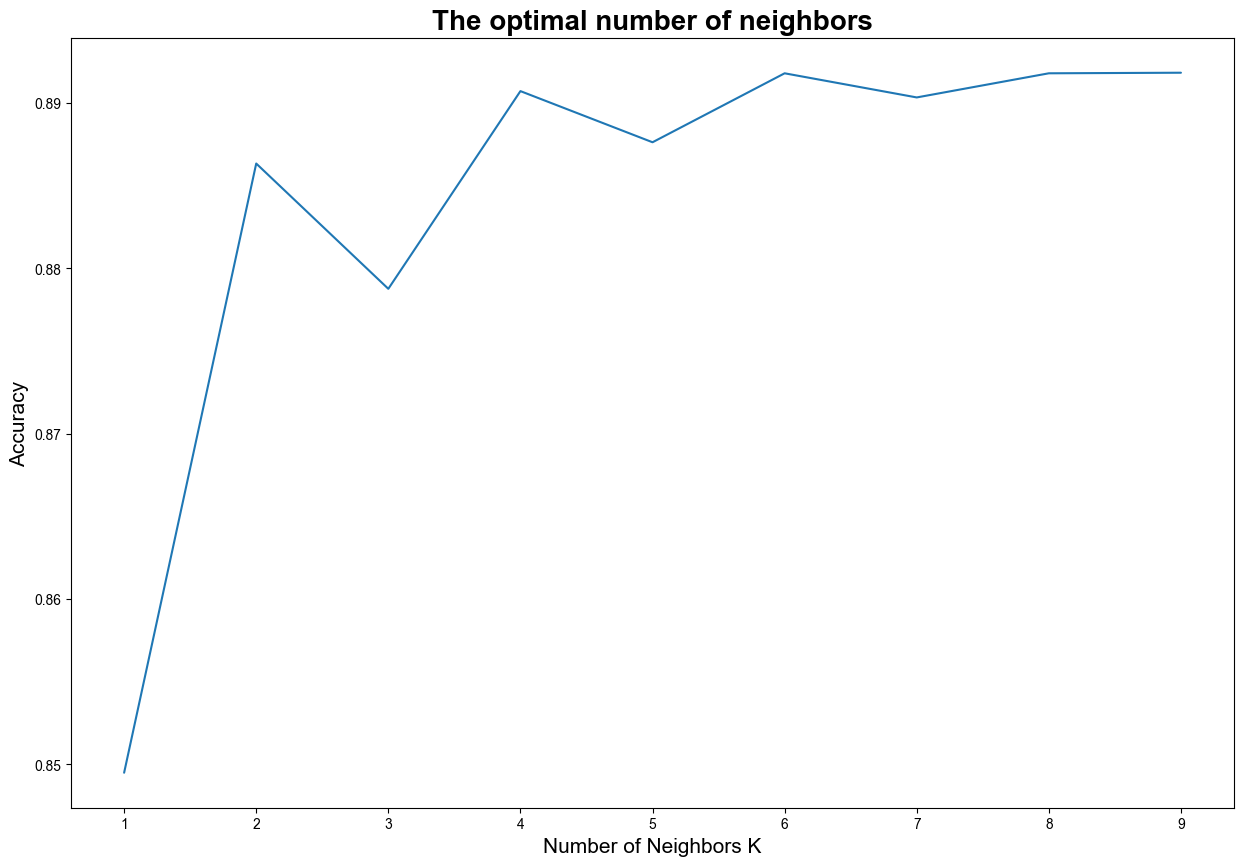

In [40]:
# Modeled from: https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification

def optimal_knn_value (k_list, knn_cv_scores):

    plt.figure()
    plt.figure(figsize=(15,10))
    plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
    plt.xlabel('Number of Neighbors K', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    sns.set_style("whitegrid")
    plt.plot(k_list, knn_cv_scores)
    plt.show()
    
optimal_knn_value(k_list, knn_cv_scores)

**Discussion:**

After trying out several K values and comparing its result, we can see from the graph above that the accuracy score increases whenever K is an even number. So based on the graph above, the, the optimal number of neighbors for our model or the best K would be 8 because it has the highest accuracy score. To be more specific, the accuracy score might increases as the value K increases, but for the sake of simplicity, I limit the range to 10.

***
### Section: 4.1.3 - Evaluate the choice of the KNN classifier
- What characteristics of the problem and data made KNN a good or bad choice?
***

**Discussion:**

Most of the attributes in the datasets are categorical, or not continuous, so I had to convert the chosen attributes such as marital and job to numerical values, because KNN algorithm only accepts numerical values such as float in order to create the classification model. So it does require an extra step in order to use KNN algorithm. Therefore, in my opinion, KNN classifier would not be my first choice if I were to create a classification model for this dataset.

***
## Section: 4.2 - Evaluation of Off-The-Shelf Classifier #2
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
### Section: 4.2.1 - Configure the off-the-shelf classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

**DECISION TREE**
- I choose Decision Tree for the second classifier.

In [41]:
from sklearn.tree import DecisionTreeClassifier

***
### Section: 4.2.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation methods you defined above.
***

**Explanation:**

All necessary conversion has been done in previous steps. I used DecisionTreeClassifier function to build the classification model. Then, I train and test the model using the train and test datasets. I chose the value 7 for max_depth because the dataset is large, so deeper tree may perform better.

In [42]:
X = clean_data_df[['age', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_numeric', 'duration']]
y = clean_data_df['y_numeric'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtc = DecisionTreeClassifier(criterion='gini', max_depth=7)
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

evaluate_classifier_results(y_test, dtc_y_pred)

Confusion Matrix:
       0    1
0  10693  287
1    998  353 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     10980
         1.0       0.55      0.26      0.35      1351

    accuracy                           0.90     12331
   macro avg       0.73      0.62      0.65     12331
weighted avg       0.87      0.90      0.88     12331

Net Benefit per Record: $       3.13
Net Benefit per Year:   $  125212.88


**Discussion:**

From the confusion matrix, we can see that there are 1024 false negatives, 10624 true negatives which are significantly higher than false negatives count. Meanwhile our true positives count is 384 and count of false positives is 299. With only 299 counts for false positives, we are not losing as much money, but it is still not an ideal count value to have.

From the classification report, we can say that our model is correct 89% of the time.

So in a year, my classification model based on Decision Tree algorithm predicted that BBI net benefit will be $802692.40.

In [43]:
depth_list = list(range(1,15,1))
# creating list of cv scores
dtc_cv_scores = []

for d in depth_list:
    dtc = DecisionTreeClassifier(criterion='gini', max_depth=d)
    dtc_scores = cross_val_score(dtc, X_train, y_train.squeeze(), cv=10, scoring='accuracy')
    dtc_cv_scores.append(dtc_scores.mean())

<Figure size 640x480 with 0 Axes>

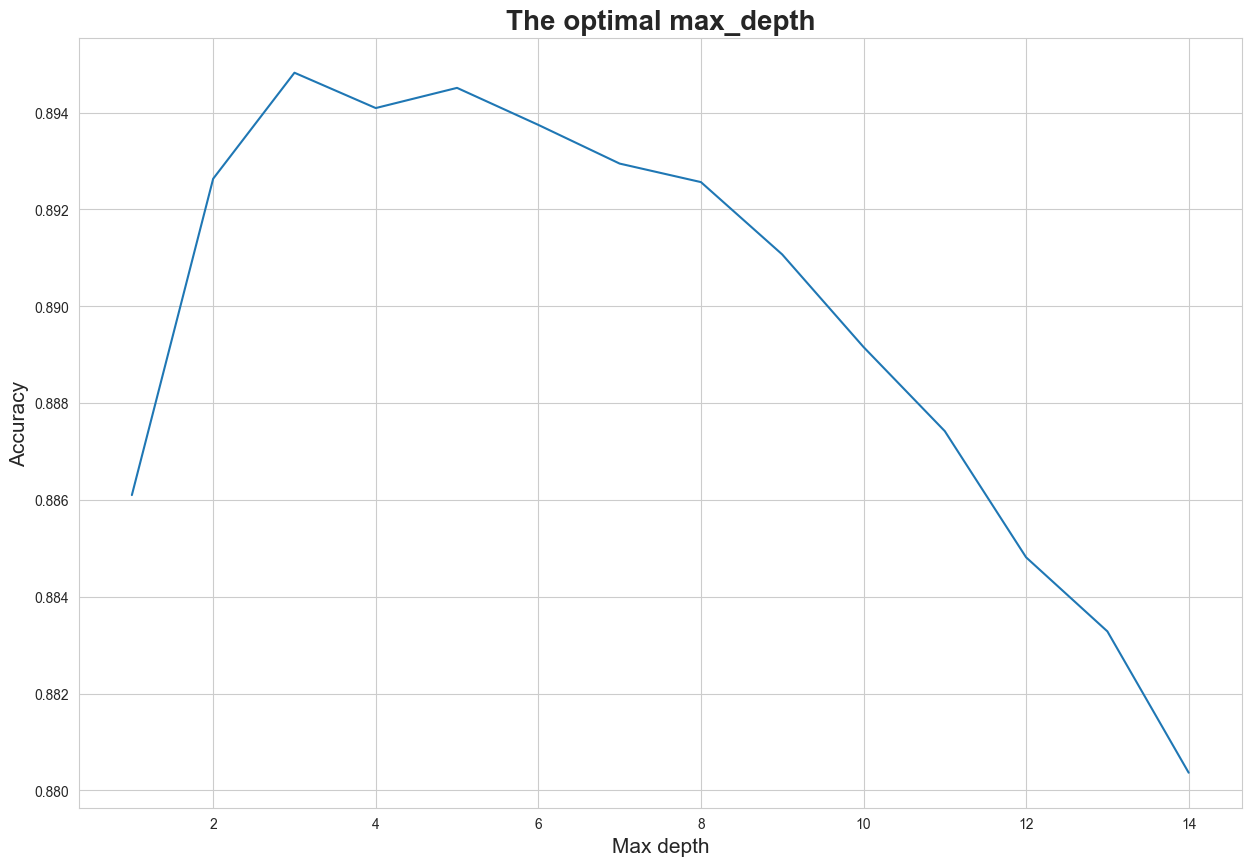

In [44]:
# Modeled from: https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification

def optimal_knn_value (depth_list, dtc_cv_scores):

    plt.figure()
    plt.figure(figsize=(15,10))
    plt.title('The optimal max_depth', fontsize=20, fontweight='bold')
    plt.xlabel('Max depth', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    sns.set_style("whitegrid")
    plt.plot(depth_list, dtc_cv_scores)
    plt.show()
    
optimal_knn_value(depth_list, dtc_cv_scores)

**Discussion**

As the graph suggested, the optimal max depth for our Decision Tree would be 5. From there, the accuracy score decreases as the max depth value increases. However, after running the code several times, it is safe to say that the optimal max depth is in between 5-7.

***
### Section: 4.2.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

**Discussion**

In my opinion, I think Decision Tree classifier would be a good choice to create a classification model for this dataset because our dataset has a good mix of numerical and categorical data, and Decision Tree algorithm can handle both numerical and categorical data. In this case however, since Scikit Learn's Decision Tree's implementation doesn't support numerical data, I convert the chosen categorical data to numerical.

***
## Section: 4.3 - Evaluation of Off-The-Shelf Classifier #3
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
### Section: 4.3.1 - Configure the off-the-shelf classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

**NAIVE BAYES**
- Since there are many types of Naive Bayes algorithms, I specifically choose to use Gaussian Naive Bayes algorithm because it works well with continuous data.

In [45]:
from sklearn.naive_bayes import GaussianNB

***
### Section: 4.3.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation methods you defined above.
***

**Explanation:**
All necessary conversion has been done in previous steps. I used GaussionNB function to build the classification model. Then, I train and test the model using the train and test datasets.

In [46]:
X = clean_data_df[['age', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_numeric', 'duration']]
y = clean_data_df['y_numeric'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)

evaluate_classifier_results(y_test, gnb_y_pred)

Confusion Matrix:
      0     1
0  9894  1024
1   897   516 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     10918
         1.0       0.34      0.37      0.35      1413

    accuracy                           0.84     12331
   macro avg       0.63      0.64      0.63     12331
weighted avg       0.85      0.84      0.85     12331

Net Benefit per Record: $       2.12
Net Benefit per Year:   $   84989.05


**Discussion:**

From the confusion matrix, we can see that there are 885 false negatives, 9930 true negatives which are significantly higher than false negatives count. Meanwhile our true positives count is 525 and count of false positives is 991. In my opinion, the count values are not looking good with false positives having a count of 991, higher than true positives. This goes the same with false negatives having a pretty high count value.

From the classification report, we can say that our model is correct 85% of the time.

So in a year, my classification model based on Gaussian Naive Bayes algorithm predicted that BBI net benefit will be $668883.30.

**Explanation:** Gaussian Naive Bayes algorithm does not have any parameter. Therefore, tuning parameter value steps will be ignore.

***
### Section: 4.3.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

**Discussion:**

Gaussian Naive Bayes might be a bad choice because Gaussian Naive Bayes assumes that attributes are independent of each other, which might not be true in this case because some of my attributes might relate to one another. Other than that, Gaussian Naive Bayes prefers the numerical data to follow a Gaussian distribution, which it may not follow.

***
# Section: 5 - Evaluation - **DO THIS!**
In this step, all of the analyses and/or models are evaluated and compared for quality and relevance / usefulness.

NOTE: This step is tightly coupled and iterative with the Modeling step.
***

***
## Section: 5.1 - Compare the performance of these classifiers to each other
- What are their strong and weak points?
***

**Discussion:**

In terms of **runtime**, Decision Tree and Gaussian Naive Bayes have faster runtime compare to KNN algorithms.   
In terms of **accuracy**, Gaussian Naive Bayes outputs the lowest accuracy compare to Decision Tree and KNN, where both outputs similar accuracy of 89%.  
In terms of **handling attribute types**, Decision Tree are able to handle both numerical and categorical attributes, meanwhile KNN and Gaussian Naive Bayes prefer handling numerical data.  
In terms of **data dependence**, only Gaussian Naive Bayes assumes the attributes are independent.   

***
## Section: 5.2 - Choose a Best Classifier
- Choose one of the three classifiers as best and explain why.
***

**Discussion**

I choose Decision Tree as the best classifier because it resulted in 89% accuracy and net benefit value of $802692.40. In general, Decision Tree works well with this dataset because it handles both categorical and numerical attributes well. So, I won't need to do any extra conversion.

***
# Section: 6 - Deployment - **SKIP THIS!**
In this step, data and resulting models and/or analyses are put to use. This may include:
- Deploying data mining / machine learning algorithms to production.
- Communicating the results of the analyses to business stakeholders, so they can take action.
***

**Discussion:**

Fill in...

***
# Section: Conclusions - **DO THIS!**
- What did you learn from this exercise?
***

**Discussion:**

In conclusion, I had fun learning how to create a classification model using three different types of classifier, and seeing its result. I realized how important it is to do preprocessing to clean up the dataset and modeling to choose the right attributes that will help train our models. Other than that, this exercise has helped me further understand how the classifiers that I chose classifies data, and in what situation would each classifier be perfect for.